<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/Malaysia%20EDA/team%2021/PropertyListingsInKL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Property Listing In KL<a href="https://www.utm.my" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Nur Izzah Mardhiah binti Rashidi A20EC0116
2. Radin Dafina binti Radin Zulkar Nain A20EC0135

# **Downloading the Dataset**


1. Download the dataset from [Kaggle](https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur).

2. Unzip the file. The folder contains an Excel file, where the dataset is.

3. Upload the Excel file into Google Drive. 


To use the dataset, we mount the Google Drive to Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


To read the dataset, we assign a variable named 'dataset' to the path of the file in Google Drive. 

In [ ]:
dataset = '/content/drive/MyDrive/Colab Notebooks/Assignment 1/Property_Listings_KL.csv'



---



# **Data Preparation and Cleaning**

We import Pandas and Numpy library

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data  = pd.read_csv(dataset)

We load the dataset into a Pandas Data Frame

In [ ]:
df = pd.DataFrame(data)
display(df)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
...,...,...,...,...,...,...,...,...
53878,"Bangsar, Kuala Lumpur","RM 5,100,000",5+1,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,"Bangsar, Kuala Lumpur","RM 5,000,000",5,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
53880,"Bangsar, Kuala Lumpur","RM 5,500,000",5+1,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
53881,"Wangsa Maju, Kuala Lumpur","RM 480,000",3,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


We explore the dataset information including the number of rows and columns and its metadata.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB




---



## **Remove rows with null value**



In [ ]:
df.dropna(inplace=True)

In [ ]:
display(df)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
7,"Taman Tun Dr Ismail, Kuala Lumpur","RM 2,600,000",5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished
...,...,...,...,...,...,...,...,...
53862,"Seputeh, Kuala Lumpur","RM 750,000",3,2.0,1.0,Condominium,Built-up : 915 sq. ft.,Partly Furnished
53868,"KL Sentral, Kuala Lumpur","RM 1,400,000",3+1,3.0,2.0,Condominium (Corner),Land area : 1544 sq. ft.,Fully Furnished
53869,"KL Eco City, Kuala Lumpur","RM 880,000",1,1.0,1.0,Condominium (Corner),Built-up : 650 sq. ft.,Partly Furnished
53876,"Sri Hartamas, Kuala Lumpur","RM 2,700,000",4+2,6.0,3.0,Condominium (Corner),"Built-up : 3,973 sq. ft.",Partly Furnished


## **Trim unnecessary string**

Standardize strings into lowercase

In [ ]:
df["Location"] = df["Location"].str.lower()

Trim 'Kuala Lumpur' in Location column

In [ ]:
df['Location'] = df['Location'].str.replace(r', ', '')
df['Location'] = df['Location'].str.replace(r'kuala lumpur', '')

*   Trim 'RM' in Price column
*   Remove commas in Price column
*   Strip whitespace in Price column

In [ ]:
df['Price'] = df['Price'].str.replace(r'RM', '')
df['Price'] = df['Price'].str.replace(r',', '')
df['Price'].str.strip()

0        1250000
2        1030000
4         900000
5        5350000
7        2600000
          ...   
53862     750000
53868    1400000
53869     880000
53876    2700000
53882     540000
Name: Price, Length: 31899, dtype: object

Remove unit 'sq. ft.' in Size column

In [ ]:
df['Size'] = df['Size'].str.replace(r'sq. ft.', '')
df['Size'] = df['Size'].str.replace(r',', '')

<ipython-input-188-efa4dadab89b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Size'] = df['Size'].str.replace(r'sq. ft.', '')


In [ ]:
display(df)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,klcc,1250000,2+1,3.0,2.0,Serviced Residence,Built-up : 1335,Fully Furnished
2,dutamas,1030000,3,4.0,2.0,Condominium (Corner),Built-up : 1875,Partly Furnished
4,bukit jalil,900000,4+1,3.0,2.0,Condominium (Corner),Built-up : 1513,Partly Furnished
5,taman tun dr ismail,5350000,4+2,5.0,4.0,Bungalow,Land area : 7200,Partly Furnished
7,taman tun dr ismail,2600000,5,4.0,4.0,Semi-detached House,Land area : 3600,Partly Furnished
...,...,...,...,...,...,...,...,...
53862,seputeh,750000,3,2.0,1.0,Condominium,Built-up : 915,Partly Furnished
53868,kl sentral,1400000,3+1,3.0,2.0,Condominium (Corner),Land area : 1544,Fully Furnished
53869,kl eco city,880000,1,1.0,1.0,Condominium (Corner),Built-up : 650,Partly Furnished
53876,sri hartamas,2700000,4+2,6.0,3.0,Condominium (Corner),Built-up : 3973,Partly Furnished


## **Parsing column values**

In [ ]:
df[['Rooms','Additional Room']] = df['Rooms'].str.split('+', expand=True)

In [ ]:
df[['Size_2','Size']] = df['Size'].str.split(':', expand=True)

In [ ]:
df[['Property Type','Property Type_2']] = df['Property Type'].str.split('(', expand=True)

In [ ]:
df['Property Type_2'] = df['Property Type_2'].str.replace(r')', '')

<ipython-input-192-e144801c2687>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Property Type_2'] = df['Property Type_2'].str.replace(r')', '')


In [ ]:
df['Property Type'].str.strip()

0         Serviced Residence
2                Condominium
4                Condominium
5                   Bungalow
7        Semi-detached House
                ...         
53862            Condominium
53868            Condominium
53869            Condominium
53876            Condominium
53882            Condominium
Name: Property Type, Length: 31899, dtype: object

In [ ]:
df['Property Type'] = df['Property Type'].str.replace(r'Condominium ', 'Condominium')
df['Property Type'] = df['Property Type'].str.replace(r'Serviced Residence ', 'Serviced Residence')
df['Property Type'] = df['Property Type'].str.replace(r'Bungalow ', 'Bungalow')
df['Property Type'] = df['Property Type'].str.replace(r'Apartment ', 'Apartment')
df['Property Type'] = df['Property Type'].str.replace(r'Condominium ', 'Condominium')
df['Property Type'] = df['Property Type'].str.replace(r'Semi-detached House ', 'Semi-detached House')
df['Property Type'] = df['Property Type'].str.replace(r'2-sty Terrace/Link House ', '2-sty Terrace/Link House')
df['Property Type'] = df['Property Type'].str.replace(r'Townhouse ', 'Townhouse')
df['Property Type'] = df['Property Type'].str.replace(r'3-sty Terrace/Link House ', '3-sty Terrace/Link House')
df['Property Type'] = df['Property Type'].str.replace(r'Flat ', 'Flat')
df['Property Type'] = df['Property Type'].str.replace(r'2.5-sty Terrace/Link House ', '2.5-sty Terrace/Link House')
df['Property Type'] = df['Property Type'].str.replace(r'1-sty Terrace/Link House ', '1-sty Terrace/Link House')
df['Property Type'] = df['Property Type'].str.replace(r'Residential Land ', 'Residential Land')
df['Property Type'] = df['Property Type'].str.replace(r'BungalowLand ', 'BungalowLand')
df['Property Type'] = df['Property Type'].str.replace(r'3.5-sty Terrace/Link House ', '3.5-sty Terrace/Link House')
df['Property Type'] = df['Property Type'].str.replace(r'4-sty Terrace/Link House ', '4-sty Terrace/Link House')
df['Property Type'] = df['Property Type'].str.replace(r'1.5-sty Terrace/Link House ', '1.5-sty Terrace/Link House')
df['Property Type'] = df['Property Type'].str.replace(r'4.5-sty Terrace/Link House ', '4.5-sty Terrace/Link House')

<ipython-input-203-0e8c59846faa>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Property Type'] = df['Property Type'].str.replace(r'2.5-sty Terrace/Link House ', '2.5-sty Terrace/Link House')
<ipython-input-203-0e8c59846faa>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Property Type'] = df['Property Type'].str.replace(r'3.5-sty Terrace/Link House ', '3.5-sty Terrace/Link House')
<ipython-input-203-0e8c59846faa>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Property Type'] = df['Property Type'].str.replace(r'1.5-sty Terrace/Link House ', '1.5-sty Terrace/Link House')
<ipython-input-203-0e8c59846faa>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Property Type'] = df['Property Type'].str.replace(r'4.5-sty Terrace/Link House ', '4.5-sty Terrace/Link House')


In [ ]:
df['Property Type'] = df['Property Type'].str.replace(r'Cluster House ', 'Cluster House')

In [ ]:
df['Property Type'].value_counts()

Condominium                   16121
Serviced Residence             8602
2-sty Terrace/Link House       1800
Bungalow                       1443
Apartment                      1101
Semi-detached House             863
3-sty Terrace/Link House        733
1-sty Terrace/Link House        334
2.5-sty Terrace/Link House      298
Townhouse                       292
Flat                            104
3.5-sty Terrace/Link House       77
1.5-sty Terrace/Link House       44
4-sty Terrace/Link House         34
Residential Land                 23
BungalowLand                     15
4.5-sty Terrace/Link House        9
Cluster House                     6
Name: Property Type, dtype: int64

In [ ]:
display(df)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Additional Room,Size_2,Property Type_2
0,klcc,1250000,2,3.0,2.0,Serviced Residence,1335,Fully Furnished,1,Built-up,None
2,dutamas,1030000,3,4.0,2.0,Condominium,1875,Partly Furnished,None,Built-up,Corner
4,bukit jalil,900000,4,3.0,2.0,Condominium,1513,Partly Furnished,1,Built-up,Corner
5,taman tun dr ismail,5350000,4,5.0,4.0,Bungalow,7200,Partly Furnished,2,Land area,None
7,taman tun dr ismail,2600000,5,4.0,4.0,Semi-detached House,3600,Partly Furnished,None,Land area,None
...,...,...,...,...,...,...,...,...,...,...,...
53862,seputeh,750000,3,2.0,1.0,Condominium,915,Partly Furnished,None,Built-up,None
53868,kl sentral,1400000,3,3.0,2.0,Condominium,1544,Fully Furnished,1,Land area,Corner
53869,kl eco city,880000,1,1.0,1.0,Condominium,650,Partly Furnished,None,Built-up,Corner
53876,sri hartamas,2700000,4,6.0,3.0,Condominium,3973,Partly Furnished,2,Built-up,Corner


## **Reset Index**

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
display(df)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Additional Room,Size_2,Property Type_2
0,klcc,1250000,2,3.0,2.0,Serviced Residence,1335,Fully Furnished,1,Built-up,None
1,dutamas,1030000,3,4.0,2.0,Condominium,1875,Partly Furnished,None,Built-up,Corner
2,bukit jalil,900000,4,3.0,2.0,Condominium,1513,Partly Furnished,1,Built-up,Corner
3,taman tun dr ismail,5350000,4,5.0,4.0,Bungalow,7200,Partly Furnished,2,Land area,None
4,taman tun dr ismail,2600000,5,4.0,4.0,Semi-detached House,3600,Partly Furnished,None,Land area,None
...,...,...,...,...,...,...,...,...,...,...,...
31894,seputeh,750000,3,2.0,1.0,Condominium,915,Partly Furnished,None,Built-up,None
31895,kl sentral,1400000,3,3.0,2.0,Condominium,1544,Fully Furnished,1,Land area,Corner
31896,kl eco city,880000,1,1.0,1.0,Condominium,650,Partly Furnished,None,Built-up,Corner
31897,sri hartamas,2700000,4,6.0,3.0,Condominium,3973,Partly Furnished,2,Built-up,Corner


## **Others**

In [ ]:
df['Rooms'] = df['Rooms'].replace(['Studio'], '1')
df['Rooms'] = df['Rooms'].replace(['20 Above'], '20')

In [ ]:
df.loc[df['Additional Room'].isnull(), 'Additional Room'] = '0'
df['Additional Room'] = df['Additional Room'].replace([''], '0')

In [ ]:
df.loc[df['Property Type_2'].isnull(), 'Property Type_2'] = None

## **Change to appropriate data types**

In [ ]:
df.dtypes

Location            object
Price               object
Rooms               object
Bathrooms          float64
Car Parks          float64
Property Type       object
Size                object
Furnishing          object
Additional Room     object
Size_2              object
Property Type_2     object
dtype: object

In [ ]:
df['Price'] = df['Price'].astype(float)
df[['Bathrooms','Car Parks','Rooms','Additional Room']] = df[['Bathrooms', 'Car Parks','Rooms','Additional Room']].astype(int)

In [ ]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df = df[df['Size'].notna()].astype({'Size': float})

In [ ]:
df.dtypes

Location            object
Price              float64
Rooms                int64
Bathrooms            int64
Car Parks            int64
Property Type       object
Size               float64
Furnishing          object
Additional Room      int64
Size_2              object
Property Type_2     object
dtype: object

## **Reorder columns**


In [ ]:
df = df.reindex(columns=['Location','Price','Size','Rooms','Additional Room','Bathrooms','Car Parks', 'Property Type', 'Property Type_2', 'Size_2','Furnishing'])

In [ ]:
df2 = df.assign(price_log=np.log10(df['Price']))

In [ ]:
# remove rows with size 0.0
indexSize = df[ (df['Size'] == 0.0)].index
df.drop(indexSize , inplace=True)

In [ ]:
display(df)

,Location,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks,Property Type,Property Type_2,Size_2,Furnishing
0,klcc,1250000.0,1335.0,2,1,3,2,Serviced Residence,None,Built-up,Fully Furnished
1,dutamas,1030000.0,1875.0,3,0,4,2,Condominium,Corner,Built-up,Partly Furnished
2,bukit jalil,900000.0,1513.0,4,1,3,2,Condominium,Corner,Built-up,Partly Furnished
3,taman tun dr ismail,5350000.0,7200.0,4,2,5,4,Bungalow,None,Land area,Partly Furnished
4,taman tun dr ismail,2600000.0,3600.0,5,0,4,4,Semi-detached House,None,Land area,Partly Furnished
...,...,...,...,...,...,...,...,...,...,...,...
31894,seputeh,750000.0,915.0,3,0,2,1,Condominium,None,Built-up,Partly Furnished
31895,kl sentral,1400000.0,1544.0,3,1,3,2,Condominium,Corner,Land area,Fully Furnished
31896,kl eco city,880000.0,650.0,1,0,1,1,Condominium,Corner,Built-up,Partly Furnished
31897,sri hartamas,2700000.0,3973.0,4,2,6,3,Condominium,Corner,Built-up,Partly Furnished


# **Exploratory Analysis and Visualization**



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Compute the mean, sum, range

In [ ]:
df.describe()

,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks
count,2.923300e+04,29233.000000,29233.000000,29233.000000,29233.000000,29233.000000
mean,1.595826e+06,2174.688098,3.029761,0.436117,2.872952,1.952690
std,2.205529e+06,9889.957541,1.189981,0.551251,1.526586,1.300809
min,3.080000e+02,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5.500000e+05,987.000000,2.000000,0.000000,2.000000,1.000000
50%,8.800000e+05,1280.000000,3.000000,0.000000,2.000000,2.000000
75%,1.700000e+06,1990.000000,3.000000,1.000000,4.000000,2.000000
max,5.128101e+07,820000.000000,20.000000,2.000000,20.000000,30.000000


**Number of properties per Neighbourhood** 

In [ ]:
df1 = df.groupby("Location").size().sort_values(ascending=False).reset_index()
shift = 0.05 * (df1[0].max() - df1[0].min())
df_sizes = df1.groupby("Location").size()[df1["Location"]]

fig = sns.catplot(
    data=df1, x=0, y="Location", kind="bar", 
    color="cadetblue", height=23, aspect=0.8)

for index, row in df1.iterrows():
    fig.ax.text(
        row[0] + shift, row.name, row[0], 
        color='black', ha="center", va="center")

fig.ax.get_xaxis().set_visible(False);
fig.despine(left=True, bottom=True)
fig.set_xlabels("No of properties");

**Total Price per Neighborhood** 

In [ ]:
def plot_by_neighborhood(feature, formatting, factor=1):
    global df2
    df2 = df.groupby("Location")[feature].median().sort_values(ascending=False).reset_index()
    
    shift = 0.1 * (df2[feature].max() - df2[feature].min())
    df_sizes = df2.groupby("Location").size()[df2["Location"]]

    fig = sns.catplot(
        data=df2, x=feature, y="Location", kind="bar", 
        color="cadetblue", height=20, aspect=0.9)

    for index, row in df2.iterrows():
        fig.ax.text(
            row[feature] + shift, row.name, formatting.format(row[feature] / factor), 
            color='black', ha="center", va="center")

    fig.ax.get_xaxis().set_visible(False);
    fig.despine(left=True, bottom=True)
    fig.ax.tick_params(left=False, bottom=False);
    fig.set_ylabels("");

In [ ]:
plot_by_neighborhood(feature="Price", formatting="RM {:.2f}m", factor = 1e6)

In [ ]:
display(df2)

,Location,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks,Property Type,Property Type_2,Size_2,Furnishing,price_log
0,klcc,1250000.0,1335.0,2,1,3,2,Serviced Residence,None,Built-up,Fully Furnished,6.096910
1,dutamas,1030000.0,1875.0,3,0,4,2,Condominium,Corner,Built-up,Partly Furnished,6.012837
2,bukit jalil,900000.0,1513.0,4,1,3,2,Condominium,Corner,Built-up,Partly Furnished,5.954243
3,taman tun dr ismail,5350000.0,7200.0,4,2,5,4,Bungalow,None,Land area,Partly Furnished,6.728354
4,taman tun dr ismail,2600000.0,3600.0,5,0,4,4,Semi-detached House,None,Land area,Partly Furnished,6.414973
...,...,...,...,...,...,...,...,...,...,...,...,...
31894,seputeh,750000.0,915.0,3,0,2,1,Condominium,None,Built-up,Partly Furnished,5.875061
31895,kl sentral,1400000.0,1544.0,3,1,3,2,Condominium,Corner,Land area,Fully Furnished,6.146128
31896,kl eco city,880000.0,650.0,1,0,1,1,Condominium,Corner,Built-up,Partly Furnished,5.944483
31897,sri hartamas,2700000.0,3973.0,4,2,6,3,Condominium,Corner,Built-up,Partly Furnished,6.431364


In [ ]:
cols = [1,2,3,4,5,6]
df_numerical = df[df.columns[cols]]
display(df_numerical)

,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks
0,1250000.0,1335.0,2,1,3,2
1,1030000.0,1875.0,3,0,4,2
2,900000.0,1513.0,4,1,3,2
3,5350000.0,7200.0,4,2,5,4
4,2600000.0,3600.0,5,0,4,4
...,...,...,...,...,...,...
31894,750000.0,915.0,3,0,2,1
31895,1400000.0,1544.0,3,1,3,2
31896,880000.0,650.0,1,0,1,1
31897,2700000.0,3973.0,4,2,6,3


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df_numerical.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
'Price', 'Size', 'Rooms', 'Additional Room', 'Bahrooms', 'Car Parks'])

print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()


Scaled Dataset Using MinMaxScaler


,Price,Size,Rooms,Additional Room,Bahrooms,Car Parks
0,0.024370,0.001628,0.052632,0.5,0.105263,0.034483
1,0.020080,0.002287,0.105263,0.0,0.157895,0.034483
2,0.017544,0.001845,0.157895,0.5,0.105263,0.034483
3,0.104322,0.008780,0.157895,1.0,0.210526,0.103448
4,0.050695,0.004390,0.210526,0.0,0.157895,0.103448


In [ ]:
sns.set(style='whitegrid')
 
sns.scatterplot(x="Size",
                    y="Price",
                    data=df_scaled)

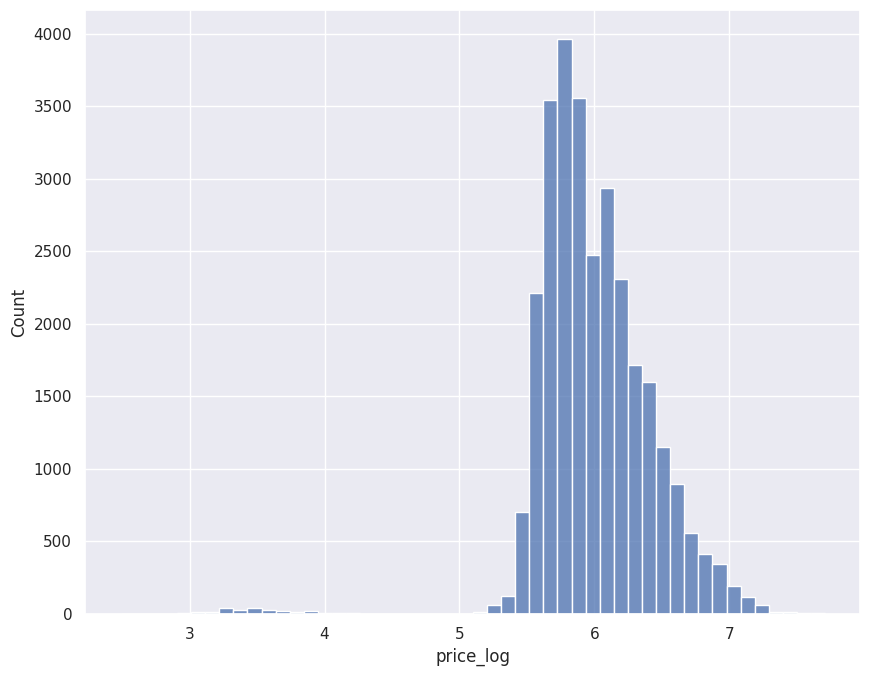

In [ ]:
sns.set(style="darkgrid")
sns

sns.histplot(data=df2, x="price_log", bins=50)
plt.show()

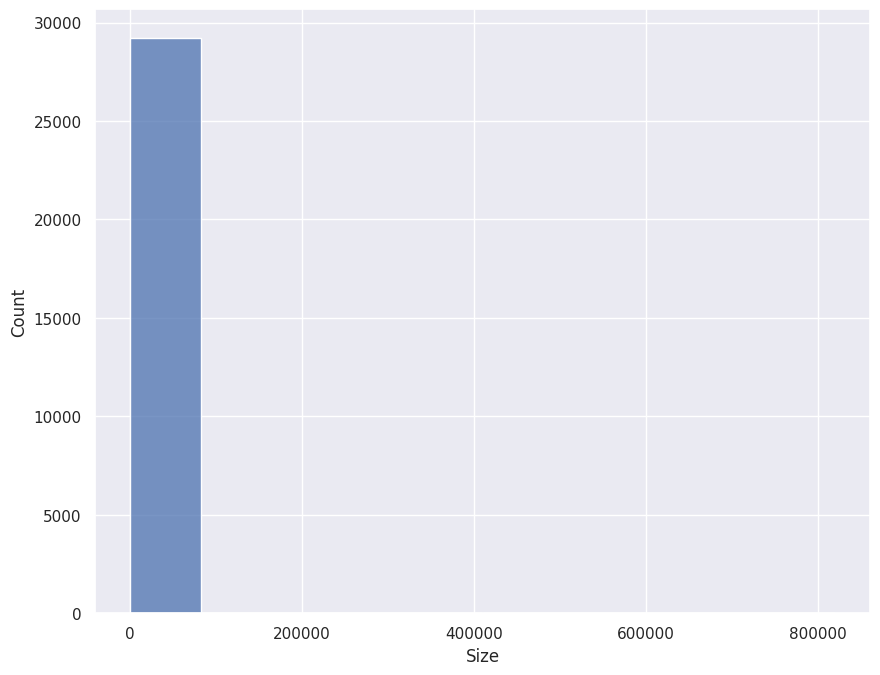

In [ ]:
sns.set(style="darkgrid")
sns

sns.histplot(data=df2, x="Size", bins=10)
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


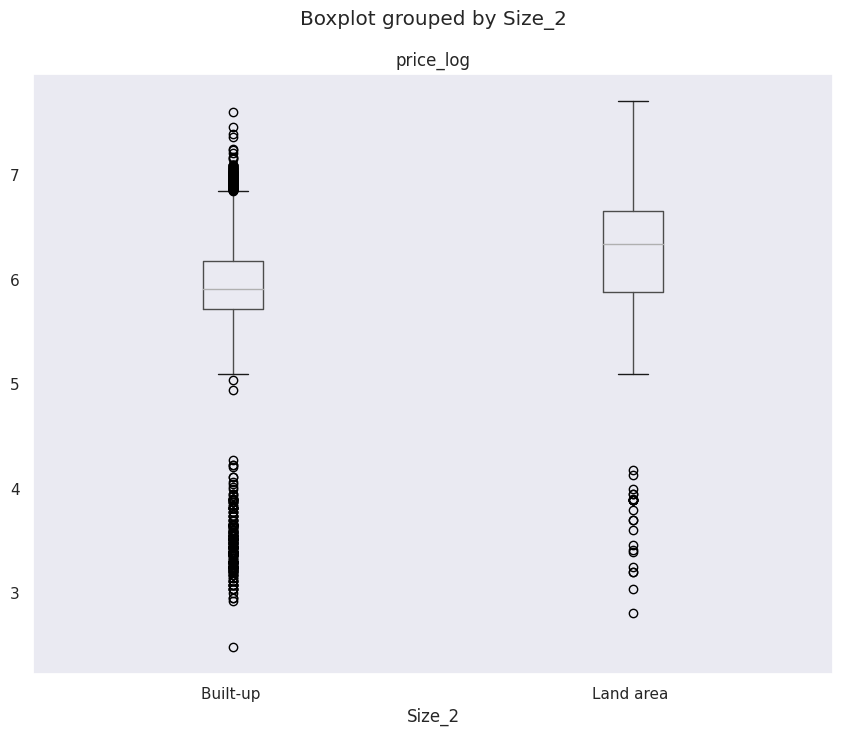

In [ ]:
df2.boxplot(by ='Size_2', column =['price_log'], grid = False)

In [ ]:
pie_chart = df['Property Type'].value_counts()
print(pie_chart)

Condominium                   16043
Serviced Residence             8570
Bungalow                       1371
Apartment                      1098
Semi-detached House             608
2-sty Terrace/Link House        534
3-sty Terrace/Link House        340
Townhouse                       245
Flat                            104
1-sty Terrace/Link House         98
2.5-sty Terrace/Link House       93
3.5-sty Terrace/Link House       52
4-sty Terrace/Link House         19
Residential Land                 19
1.5-sty Terrace/Link House       16
BungalowLand                     15
4.5-sty Terrace/Link House        7
Cluster House                     1
Name: Property Type, dtype: int64


In [ ]:
pie_chart.to_frame(name="Frequency", )
pie_chart = pie_chart.reset_index(level=0)
display(pie_chart)

,index,Property Type
0,Condominium,16043
1,Serviced Residence,8570
2,Bungalow,1371
3,Apartment,1098
4,Semi-detached House,608
5,2-sty Terrace/Link House,534
6,3-sty Terrace/Link House,340
7,Townhouse,245
8,Flat,104
9,1-sty Terrace/Link House,98


In [ ]:
display(pie_chart)

,Property Type
Condominium,16043
Serviced Residence,8570
Bungalow,1371
Apartment,1098
Semi-detached House,608
2-sty Terrace/Link House,534
3-sty Terrace/Link House,340
Townhouse,245
Flat,104
1-sty Terrace/Link House,98


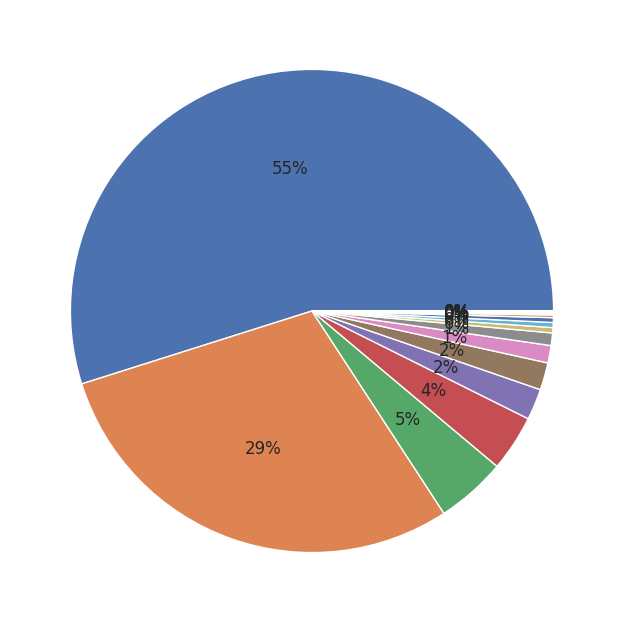

In [ ]:
# plotting data on chart
plt.pie(pie_chart['Property Type'],colors=sns.color_palette('deep'), autopct='%.0f%%')
  
# displaying chart
plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

# **Asking and Answering Questions**



In [ ]:
display(df)

,Location,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks,Property Type,Property Type_2,Size_2,Furnishing
0,klcc,1250000.0,1335.0,2,1,3,2,Serviced Residence,None,Built-up,Fully Furnished
1,dutamas,1030000.0,1875.0,3,0,4,2,Condominium,Corner,Built-up,Partly Furnished
2,bukit jalil,900000.0,1513.0,4,1,3,2,Condominium,Corner,Built-up,Partly Furnished
3,taman tun dr ismail,5350000.0,7200.0,4,2,5,4,Bungalow,None,Land area,Partly Furnished
4,taman tun dr ismail,2600000.0,3600.0,5,0,4,4,Semi-detached House,None,Land area,Partly Furnished
...,...,...,...,...,...,...,...,...,...,...,...
31894,seputeh,750000.0,915.0,3,0,2,1,Condominium,None,Built-up,Partly Furnished
31895,kl sentral,1400000.0,1544.0,3,1,3,2,Condominium,Corner,Land area,Fully Furnished
31896,kl eco city,880000.0,650.0,1,0,1,1,Condominium,Corner,Built-up,Partly Furnished
31897,sri hartamas,2700000.0,3973.0,4,2,6,3,Condominium,Corner,Built-up,Partly Furnished


> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: What type of furnishing it is for most of the property listed? What is the percentage?


In [ ]:
q1 = df['Furnishing'].value_counts()
print(q1)

Partly Furnished    16272
Fully Furnished      9545
Unfurnished          3249
Unknown               167
Name: Furnishing, dtype: int64


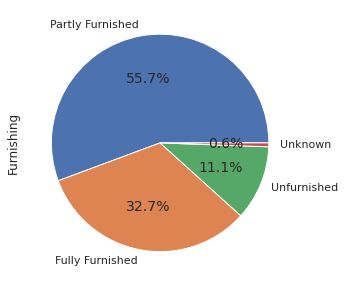

In [ ]:
q1.plot(kind='pie',autopct="%1.1f%%")

*Most of the properties are partly furnished with the percentage of 55.7%*





---




#### Q2: What is the smallest size for a bungalow available on the list?

In [ ]:
smallest_condo = df[df['Property Type'] == 'Bungalow']

In [ ]:
smallest_condo.sort_values(by=['Size'], ascending=True).head(1)

,Location,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks,Property Type,Property Type_2,Size_2,Furnishing
3627,mont kiara,3600000.0,1500.0,4,1,7,3,Bungalow,None,Land area,Partly Furnished


*The smallest bungalow available is located at Mont Kiara with the size of 1500 square feet*



---



In [ ]:
df.sort_values(by=['Price'])

,Location,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks,Property Type,Property Type_2,Size_2,Furnishing
9760,cheras,308.0,820.0,3,0,2,1,Apartment,None,Built-up,Unknown
24275,setapak,650.0,1270.0,3,0,2,2,Serviced Residence,Intermediate,Land area,Partly Furnished
9011,segambut,850.0,850.0,3,0,2,1,Apartment,Intermediate,Built-up,Unfurnished
29649,kl city,900.0,800.0,3,0,1,1,Apartment,Intermediate,Built-up,Partly Furnished
28217,bukit bintang,900.0,968.0,3,0,2,1,Apartment,None,Built-up,Unfurnished
...,...,...,...,...,...,...,...,...,...,...,...
13178,mont kiara,40542340.0,5090.0,4,1,5,3,Condominium,None,Built-up,Partly Furnished
24638,brickfields,41741000.0,44550.0,5,2,5,4,Bungalow,EndLot,Land area,Unfurnished
5311,ampang,50000000.0,6617.0,7,1,8,4,Bungalow,None,Land area,Fully Furnished
2391,ampang hilir,50000000.0,30000.0,8,1,10,6,Bungalow,Corner,Land area,Fully Furnished


#### Q3: Does number of rooms influence the rising price of those properties?

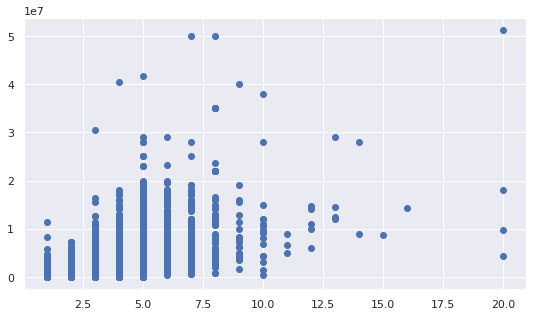

In [ ]:
plt.scatter(df['Rooms'], df['Price'])
plt.show()

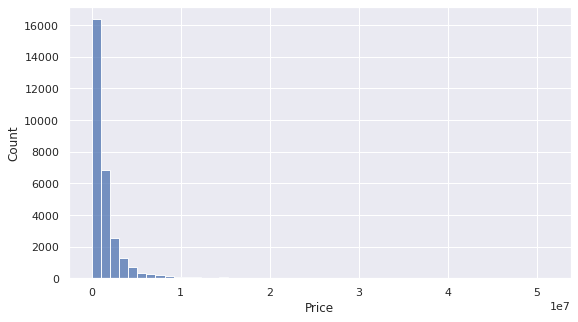

In [ ]:
sns.set(style="darkgrid")
sns

sns.histplot(data=df, x="Price", bins=50)
plt.show()

*As shown in the scatter plot, there is no clear pattern that can be seen. We aware that this is because the price data is skewed. There is more data on cheaper properties than the expensive ones as displayed in the histogram above. Thus, the scatter plot is denser towards the left and bottom part of the graph*

Selecting and focusing on price data that is near to mean value

In [ ]:
price_relevant = df[df['Price'] <= 2000000]
display(price_relevant)

,Location,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks,Property Type,Property Type_2,Size_2,Furnishing
0,klcc,1250000.0,1335.0,2,1,3,2,Serviced Residence,None,Built-up,Fully Furnished
1,dutamas,1030000.0,1875.0,3,0,4,2,Condominium,Corner,Built-up,Partly Furnished
2,bukit jalil,900000.0,1513.0,4,1,3,2,Condominium,Corner,Built-up,Partly Furnished
6,sri petaling,385000.0,904.0,3,0,2,1,Apartment,Intermediate,Built-up,Partly Furnished
9,mont kiara,1780000.0,1830.0,4,1,4,2,Condominium,Corner,Built-up,Partly Furnished
...,...,...,...,...,...,...,...,...,...,...,...
31893,ampang,490000.0,705.0,1,0,1,1,Serviced Residence,None,Built-up,Partly Furnished
31894,seputeh,750000.0,915.0,3,0,2,1,Condominium,None,Built-up,Partly Furnished
31895,kl sentral,1400000.0,1544.0,3,1,3,2,Condominium,Corner,Land area,Fully Furnished
31896,kl eco city,880000.0,650.0,1,0,1,1,Condominium,Corner,Built-up,Partly Furnished


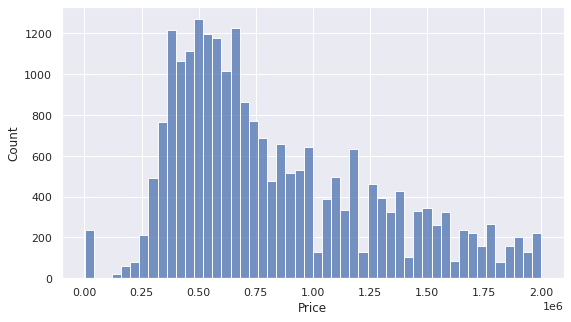

In [ ]:
sns.set(style="darkgrid")
sns

sns.histplot(data=price_relevant, x="Price", bins=50)
plt.show()

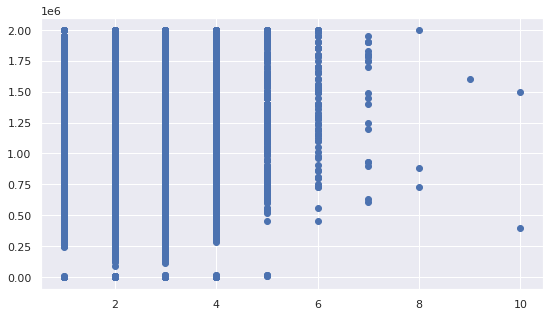

In [ ]:
plt.scatter(price_relevant['Rooms'], price_relevant['Price'])
plt.show()

*The scatter plot shows a slight pattern that displays the more number of rooms, the pricier the properties become.*

#### Q4: Does any of built-up type is suitable for a family of 6 (based on the number of rooms)?

In [ ]:
df[(df['Size_2'] =='Built-up ') & (df['Rooms'] >= 6)].sort_values(by=['Rooms'], ascending=True)

,Location,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks,Property Type,Property Type_2,Size_2,Furnishing
14712,kuchai lama,1523000.0,2798.0,6,1,6,5,Condominium,Corner,Built-up,Partly Furnished
21981,desa parkcity,5600000.0,7218.0,6,1,6,3,2.5-sty Terrace/Link House,EndLot,Built-up,Fully Furnished
21610,klcc,7000000.0,6552.0,6,1,8,5,Condominium,Triplex,Built-up,Partly Furnished
20693,mont kiara,2960000.0,4550.0,6,1,6,4,Condominium,Duplex,Built-up,Partly Furnished
20639,kuchai lama,1523000.0,2798.0,6,1,6,5,Condominium,Corner,Built-up,Partly Furnished
...,...,...,...,...,...,...,...,...,...,...,...
6396,setapak,730000.0,2500.0,8,0,3,2,Condominium,Intermediate,Built-up,Partly Furnished
26461,bukit tunku (kenny hills),4680000.0,6268.0,8,1,8,4,Condominium,Corner,Built-up,Partly Furnished
17900,kl city,398000.0,420.0,10,0,1,1,Serviced Residence,Corner,Built-up,Fully Furnished
27747,kl city,4300000.0,6000.0,10,0,8,4,Condominium,Corner,Built-up,Fully Furnished


*There is 151 available built-up properties that is suitable for a family with 6 members*

#### Q5: Recommend affordable properties for a newly-wed couple which is fine with only 1 bedroom and 1 guest room

In [ ]:
df[(df['Rooms'] == 2)].sort_values(by=['Price'], ascending=True)

,Location,Price,Size,Rooms,Additional Room,Bathrooms,Car Parks,Property Type,Property Type_2,Size_2,Furnishing
11302,bandar menjalara,1300.0,1076.0,2,1,2,1,Condominium,Intermediate,Built-up,Fully Furnished
19904,setapak,1300.0,1104.0,2,0,2,1,Condominium,Corner,Built-up,Partly Furnished
30462,jalan klang lama (old klang road),1600.0,852.0,2,1,2,1,Serviced Residence,None,Built-up,Partly Furnished
20585,jalan klang lama (old klang road),1600.0,868.0,2,0,2,1,Condominium,None,Built-up,Partly Furnished
21137,jalan klang lama (old klang road),1650.0,1000.0,2,1,3,1,Condominium,Corner,Built-up,Partly Furnished
...,...,...,...,...,...,...,...,...,...,...,...
23469,klcc,6200000.0,1722.0,2,1,2,2,Condominium,Corner,Built-up,Fully Furnished
23470,klcc,6500000.0,1830.0,2,1,2,2,Condominium,Corner,Built-up,Fully Furnished
6726,bukit jalil,7200000.0,868.0,2,0,2,1,Serviced Residence,Corner,Built-up,Partly Furnished
15537,kl sentral,7224000.0,2408.0,2,1,4,2,Serviced Residence,Corner,Built-up,Partly Furnished


*There are various selection of properties that is suitable for 2 persons with price as low as RM1300*

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to E-learning


 